### Chapter 04. 우리 동네 인구 구조를 산점도로 나타내기

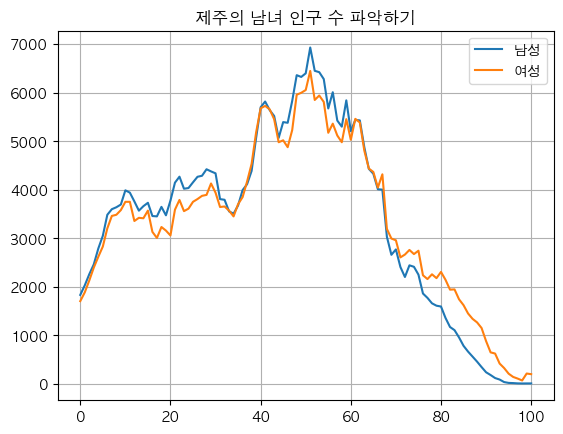

In [1]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', 'r', encoding='cp949')
data = csv.reader(f)

header = next(data)

name = input('인구 구조를 알고싶은 지역명을 입력하세요.: ')
male = []
female = []

for row in data:
    if name in row[0]:
        for j in row[3:104]: # 남성의 나이가 저장된 열 범위
            j = j.replace(',', '')
            male.append(int(j))
            
        for j in row[106:207]: # 여성의 나이가 저장된 열 범위
            j = j.replace(',', '')
            female.append(int(j))        
        break
        
f.close()

# 데이터 시각화하기
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure()
plt.title(name + '의 남녀 인구 수 파악하기')
plt.plot(male, label='남성') # x 생략 가능
plt.plot(female, label='여성')
plt.grid(True)
plt.legend()
plt.show()

#### ✅ plot(x, y) 
    기본적으로 (x,y)를 넣어야함. 그러나 x값이 0부터 카운팅이 되면서 1씩 증가하는 등차수열의 형태라면 생략 가능하다.

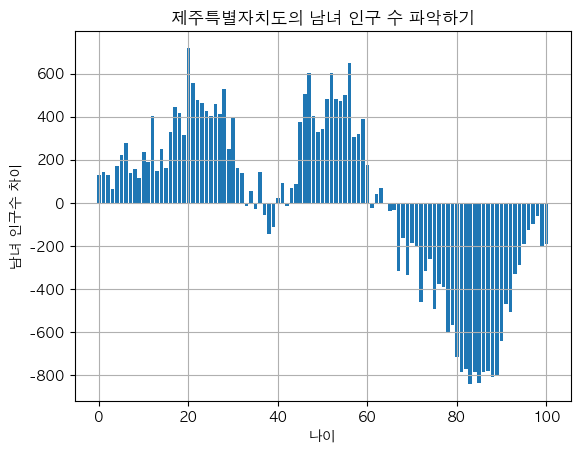

In [4]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', 'r', encoding='cp949')
data = csv.reader(f)

header = next(data)

name = input('인구 구조를 알고싶은 지역명을 입력하세요.: ')

diff =  []
for row in data:
    if name in row[0]:
        for j in range(3, 104, 1):
            # 남자 인구수와 여자 인구수의 차이를 구하기 위한 코드
            diff.append(int(row[j].replace(',', '')) - 
                        int(row[j + 103].replace(',', ''))) # 여자 인구수의 열
                
        break
        
f.close()

# 데이터 시각화하기
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure()
plt.title(name + '의 남녀 인구 수 파악하기')

plt.bar(range(0,len(diff),1), diff) # bar 함수의 인자는 무조건 두 개여야함.

plt.grid(True)
plt.xlabel('나이')
plt.ylabel('남녀 인구수 차이')
plt.show()

    남성의 인구수에서 여성의 인구수를 뺐으므로 바가 위쪽으로 향하는 경우 남성의 수가 더 많고 아래로 향하는 경우 여성의 수가 더 많음을 알 수 있음.

> ### scatter( ) + colorbar( )

In [ ]:
plt.figure()
# scatter 함수는 x축과 y축의 값을 담아야 하므로 아래와 같은 형태로 작성한다.
plt.scatter([1,2,3,4],[1,2,3,4], 
            s=[100,200,300,400], # s= 점의 사이즈 차례로 지정
            c=['red','green','blue','black']
            )

plt.grid(True)
plt.show()

    그러나 점의 개수가 많아지면 색상을 일일이 지정을 할 수 없게됨

#### ✅ colorbar( )
     산점도나 이미지 등에서 “색상”이 의미하는 수치를 눈으로 보여주는 막대 그래프

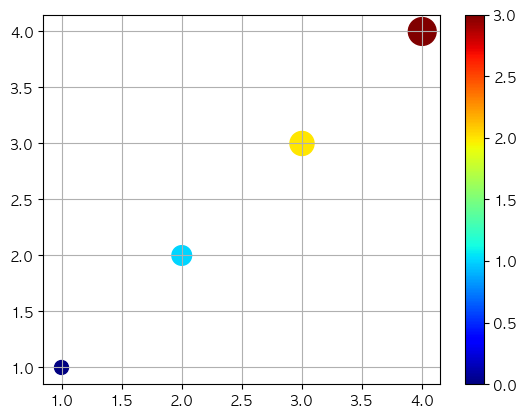

In [22]:
plt.figure()
# scatter 함수는 x축과 y축의 값을 담아야 하므로 아래와 같은 형태로 작성한다.
plt.scatter([1,2,3,4],[1,2,3,4], 
            s=[100,200,300,400], # size
            c=range(0,4,1), # color ---> range함수를 통해 색상 자동 지정
            cmap='jet' # ✅ color map: 색상지도
            )

plt.colorbar()

plt.grid(True)
plt.show()

#### ✅ alpha
    - 0~1 사이의 값을 넣으면 됨
    - 0: 아예 투명
    - 1: 불투명

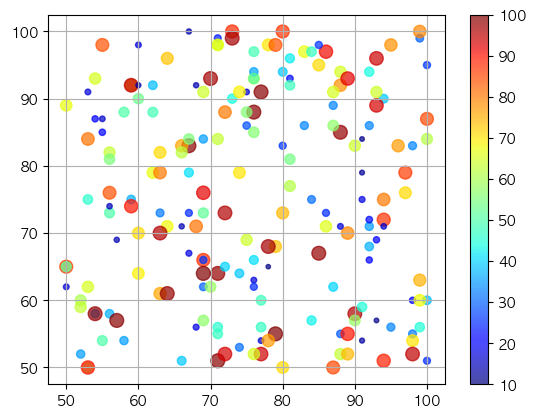

In [30]:
import random
x, y = [], []
size = []

for j in range(0,200,1):
    x.append(random.randint(50,100))
    y.append(random.randint(50,100))
    size.append(random.randint(10,100))
    
plt.figure()
plt.scatter(x, y, s=size, c=size, 
            cmap='jet', 
            alpha=0.7) # ✅ 원과 원이 중첩되어 있는 경우 확인하기 위해 사용 (투명도)

plt.colorbar()
plt.grid(True)
plt.show()

> ### scatter 함수 형태로 인구구조 파악해보기

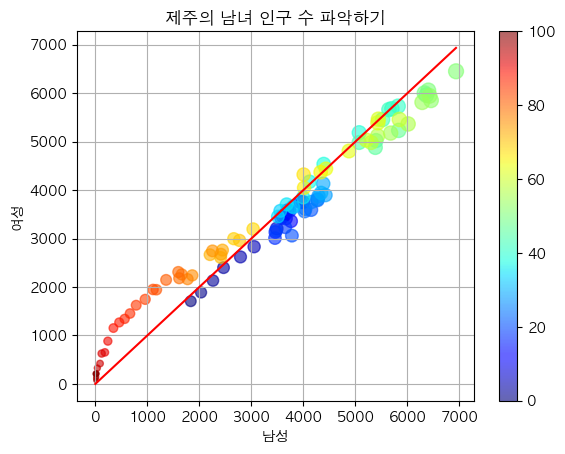

In [40]:
import math 
import csv
import matplotlib.pyplot as plt

f = open('gender.csv', 'r', encoding='cp949')
data = csv.reader(f)

header = next(data)

name = input('인구 구조를 알고싶은 지역명을 입력하세요.: ')
male = []
female = []
size = []

for row in data:
    if name in row[0]:
        for j in row[3:104]: # 남성의 나이가 저장된 열 범위
            male.append(int(j.replace(',', '')))
            
        for j in row[106:207]: # 여성의 나이가 저장된 열 범위
            female.append(int(j.replace(',', '')))        
        
        for j in range(0, len(male), 1): # 전체 인구수
            size.append(math.sqrt(male[j] + female[j])) # ✅ square root (제곱근)
            
        break
        
f.close()

# 데이터 시각화하기
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure()
plt.title(name + '의 남녀 인구 수 파악하기')

plt.scatter(male,female,
            c=range(0, len(male), 1),
            cmap='jet',
            s=size,
            alpha=0.6)

# 남성과 여성의 인구수 비교를 위해 선을 그어줌
plt.plot(range(0, max(male)), range(0, max(male)), color='red')

plt.grid(True)
plt.xlabel('남성')
plt.ylabel('여성')
plt.colorbar()
plt.show()

    빨간선을 기준으로 위에 있으면 여성의 인구수가 더 많고 아래에 있으면 남성의 인구수가 더 많음